# To predict the House Price based on various features

1. EDA
2. FE
3. FS
4. Model Building 

# 1. EDA

     1. Missing Values (Here we'll only detect the missing values and in "FE we'll handle the missing values") 
     2. All the numerical variables
     3. Distribution of numerical variables (if skewed, we need to do transformation)
     4. Categorical variables
     5. Cardinality of categorical variables (No. of unique values in a particular column)
     6. Outliers
     7. Relationship between Independent and dependent features(Sale Price)


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib inline makes your plot outputs appear and be stored within the notebook.
%matplotlib inline  


import seaborn as sns
sns.set_theme()

## To Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [6]:
df=pd.read_csv('D://train.csv')
df.shape

(1460, 81)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.1 Missing Values:

In [8]:
# Detecting the % of NAN values in each feature of the dataset

# Step1: Make list of features having missing values
features_with_NA=[features for features in df.columns if df[features].isnull().sum()>1]

#Print the feature name and % of Missing value
for i in features_with_NA:
    print(i,np.round(df[i].isnull().mean(),4), '% of missing values')

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.0055 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


### <font color='red'> In EDA we just detect the missing values and whether to handle the missing values or not and if yes then how to handle the missing values will be done in Feature Engg. part </font>

### Since there are many missing values, we need to find the relationship between "missing values" and "Sales Price"

### Creating a count plot : y-axis(Sales Price), x-axis(Count of missing values)

###  You can determine the relationship from the plot in such a way that if the count of missing values is high then the sales price is dropping or not. 

In [9]:
features_with_NA

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

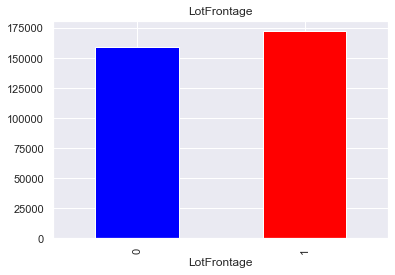

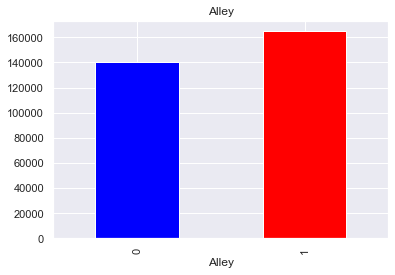

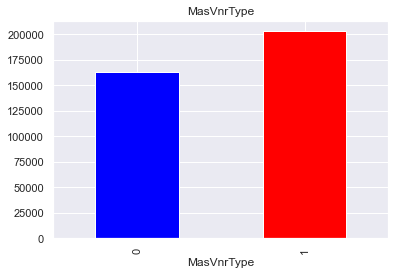

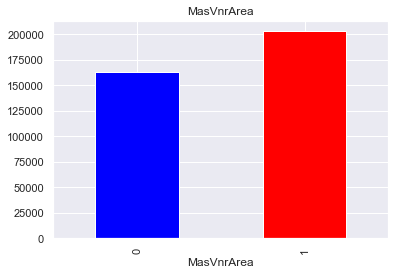

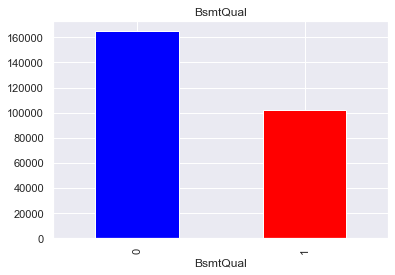

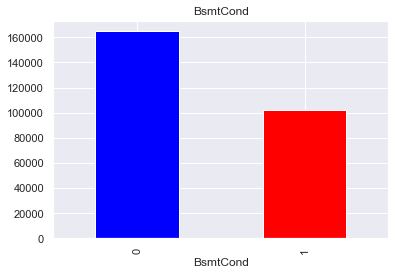

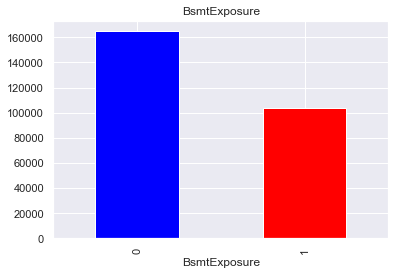

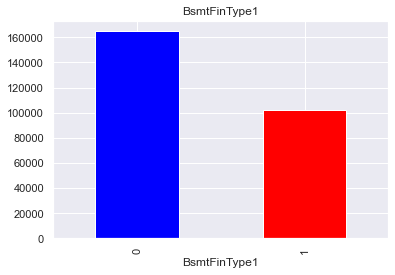

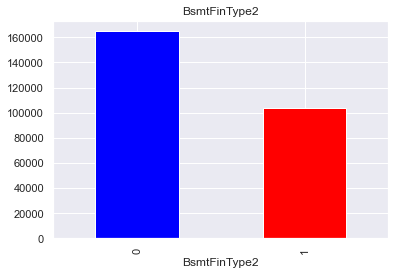

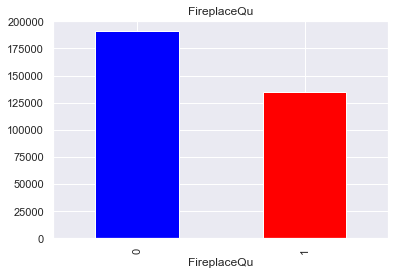

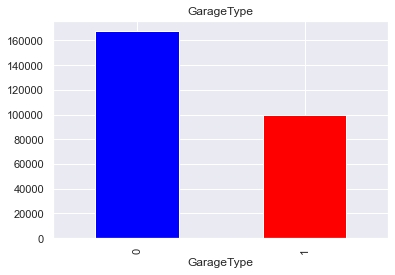

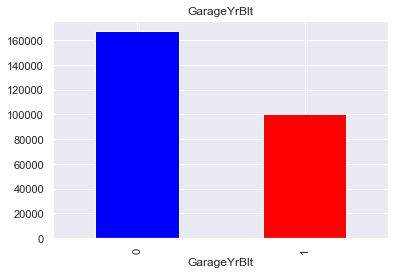

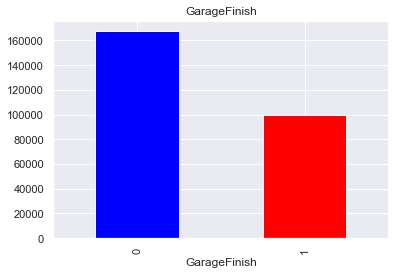

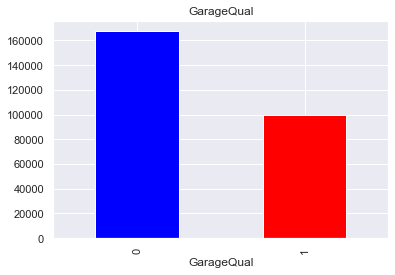

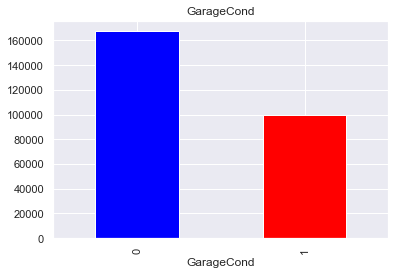

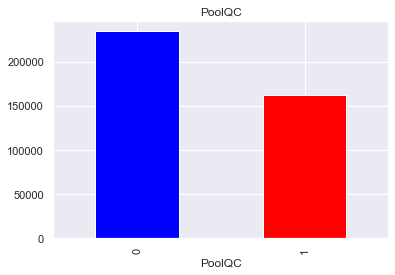

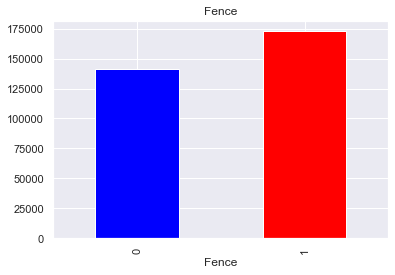

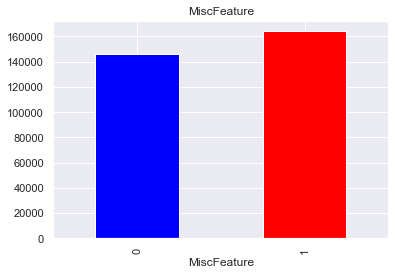

In [10]:
for i in features_with_NA:
    data= df.copy() # making a dataset copy of the orignal data
    
    # making a variable that indicates 1 if the observation was missing 
    data[i]=np.where(data[i].isnull(),1,0) #wherever the dataset value is null replace it with else 0: And then you can create a count plot
    
    #Calculating the mean sales price where the info is missing or present
    data.groupby(i)['SalePrice'].median().plot.bar(color=['blue', 'red'])
    plt.title(i)
    plt.show()

## <font color='purple'> Observation: The relationship between Target Variable and the Missing values can be clearly seen. i.e., Wherever there is more missing values the Sales Price is also High. </font>

# 1.2 Numerical Variables:

In [11]:
# Extracting only numerical features from the dataset and making list of it
num_features=[feature for feature in df.columns if df[feature].dtypes !='O'] #list comprehension

print("No. of Numeric Features:", len(num_features))

df[num_features].head()

No. of Numeric Features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### <Font color='purple'> 1. Drop ID feature </font>
### <Font color='purple'> 2. To handle year features (DateTime Variables) </font>
Here, we've 4 Year variables `('YearBuilt', 'YearRemodAdd', 'GarageYrBlt	', 'YrSold')` we can perform analysis on this features..Like we can find the difference in years between the year the house was built and the year the house was sold.

In [12]:
# Code to extract year features from the dataset, Instead of doing it manually

yr_features=[feature for feature in num_features if 'Yr' in feature or 'Year' in feature]

yr_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
#To get the unique variables of all the year features in the dataset:

for i in yr_features:
    print(i, df[i].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

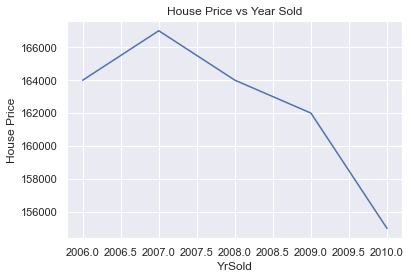

In [14]:
# To check whether there's any relationship between the year the house is sold and Sale price

df.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('House Price')
plt.title('House Price vs Year Sold')

## <font color='purple'> As the Year is increasing the price is decreasing. </font>

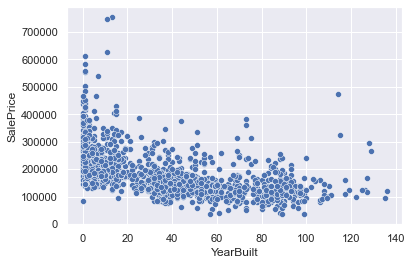

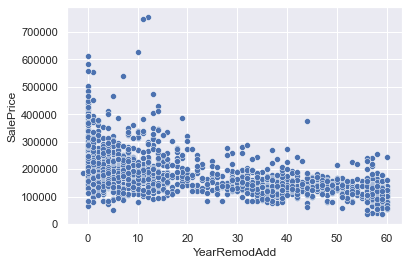

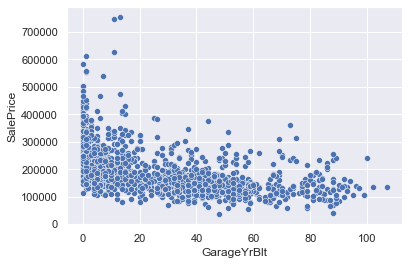

In [15]:
for i in yr_features:
    if i!='YrSold':
        data=df.copy()
        
        #Finding the diffr betn variables of each feature in yr_feature and YrSold
        data[i]=data['YrSold']-data[i]
        
        sns.scatterplot(x=data[i],y=data['SalePrice'],data=data)
        plt.show()

## <font color='purple'> 1.YearBuilt: When the house was 140 yrs old the price was very very less  </font>
## <font color='purple'> 2.YearBuilt: When the house was very new (0-20yrs) old the price was very very high </font>

### Extracting only discrete feature from num_feature and then visualizing if they are having some relationship w.r.t Target Variable (SalePrice)

#### A. Discrete Variables:

In [16]:
# Discrete variables do have some int values but they have some fixed set of int values
# And so you've to set some threshold parameter for unique values(here it is 25)

discrete_features=[feature for feature in num_features if len(df[feature].unique())<25 and feature not in yr_features +['ID']]

print('Count of Discrete_Variables:', len(discrete_features))

Count of Discrete_Variables: 17


In [17]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


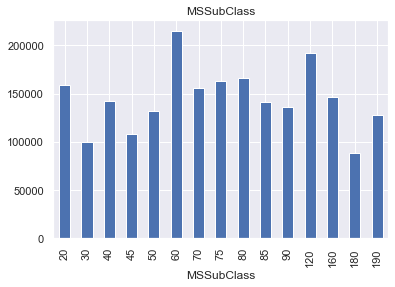

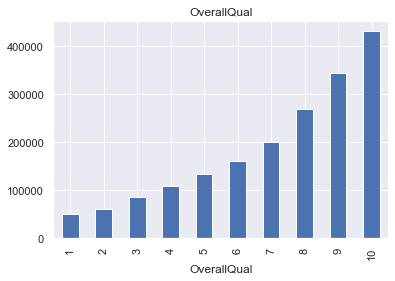

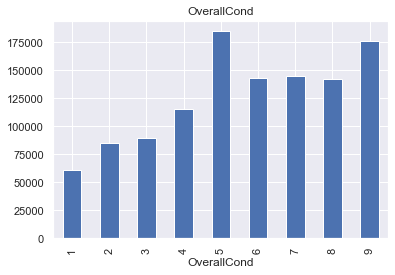

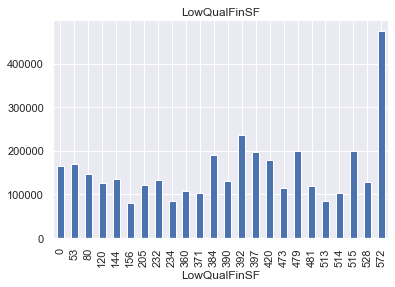

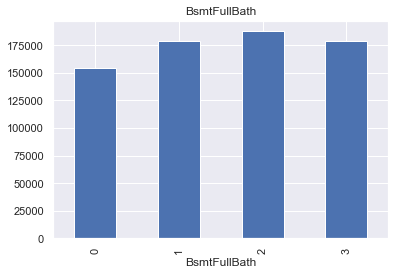

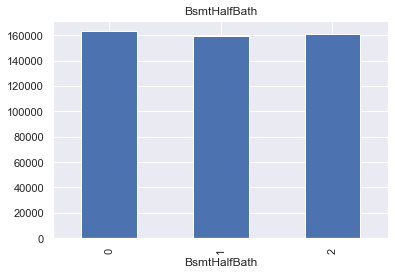

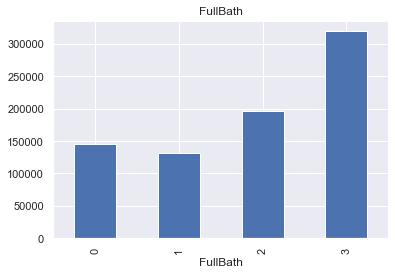

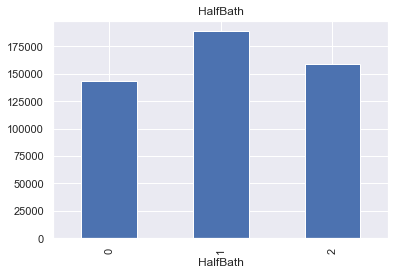

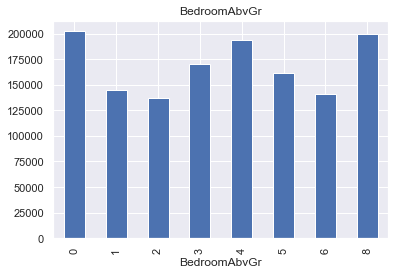

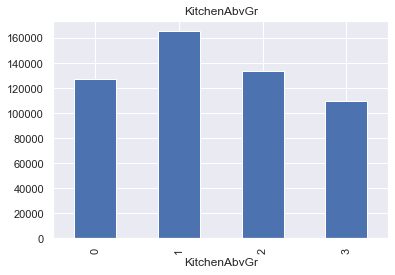

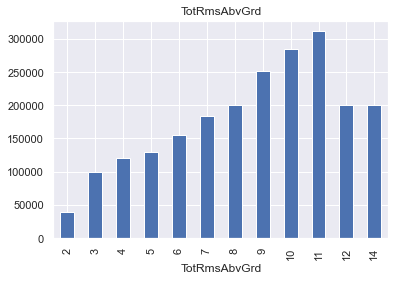

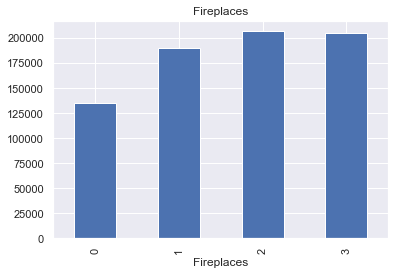

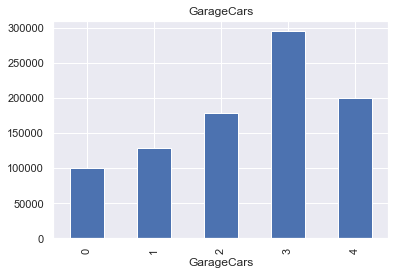

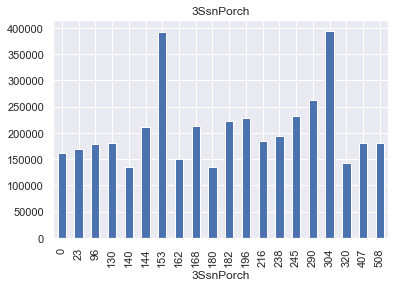

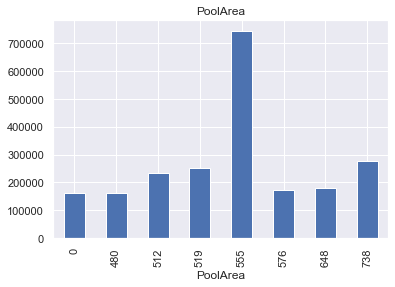

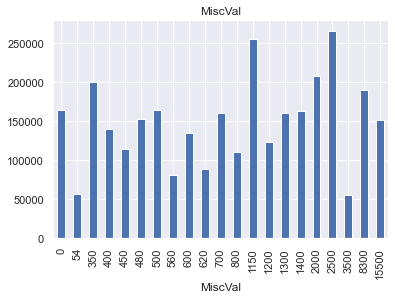

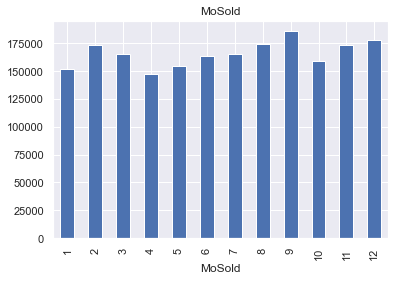

In [19]:
# Finding relationship betn them and Sales Price

import matplotlib.colors as colors

for feature in discrete_features:
    data=df.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

## <font color='purple'> There's an exponetial rise in price as the overall quality is increasing </font> 

#### B. Continous Variables:

In [20]:
continous_features=[feature for feature in num_features if feature not in discrete_features + yr_features+['Id']]

print("Continuous feature Count {}".format(len(continous_features)))

Continuous feature Count 16


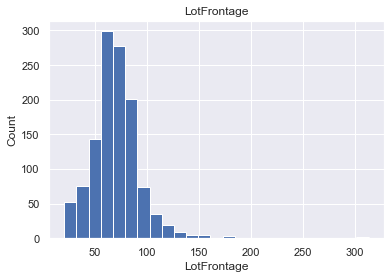

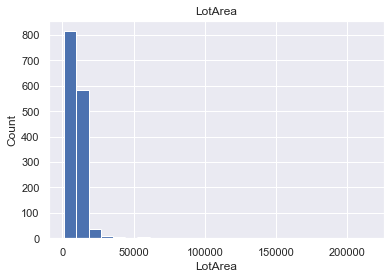

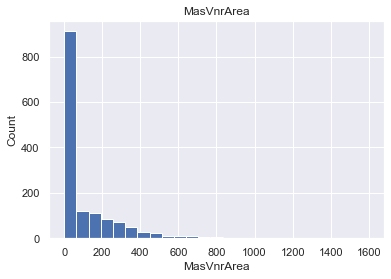

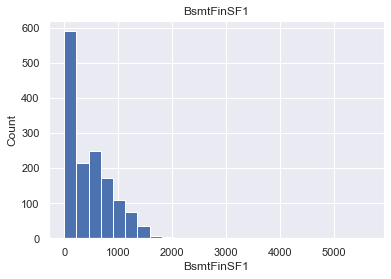

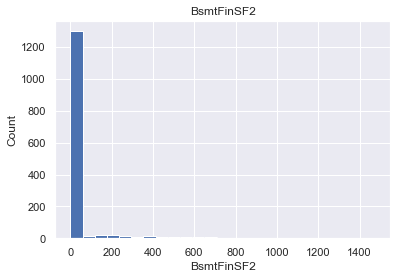

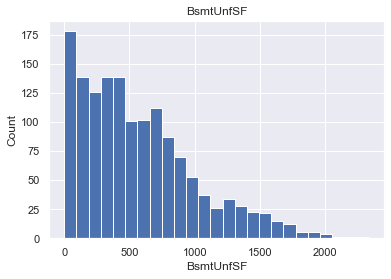

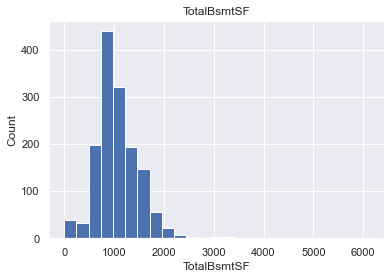

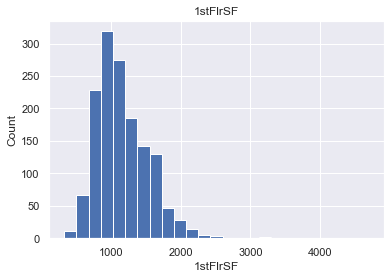

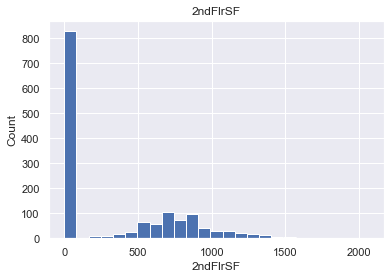

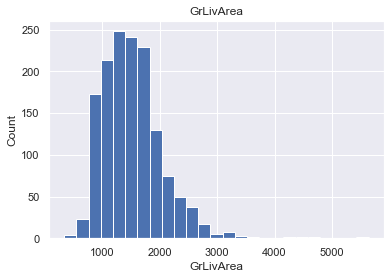

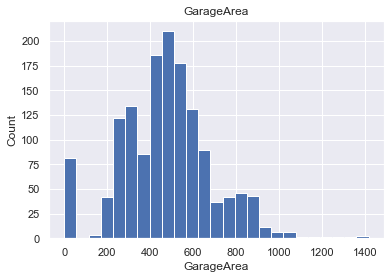

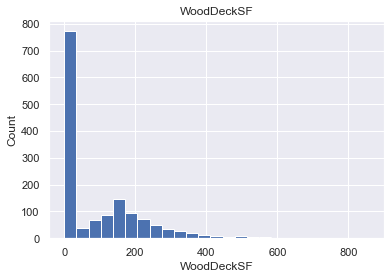

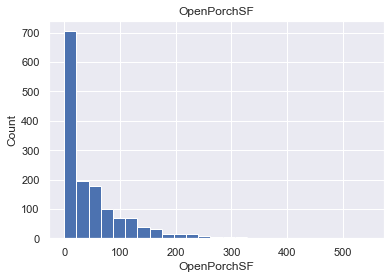

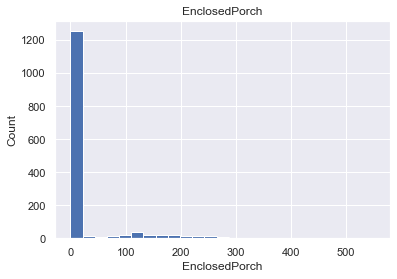

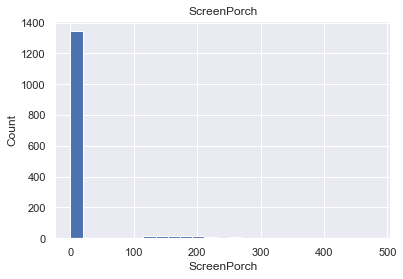

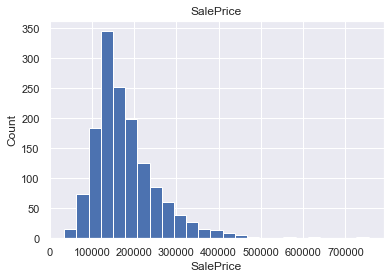

In [21]:
# Plotting Histogram to check the distribution of continous values

for i in continous_features:
    data=df.copy()
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

## <font color='purple'> Some feature do follow Norm. Dist. but not all the features. And so we can say that "The Dist. is SKEWED". And so The Feature Transformation is required. Which will be done in Feature Engg. </font>

#### For Linear Regression if our data is skewed we transformed it into log norm. dist. 

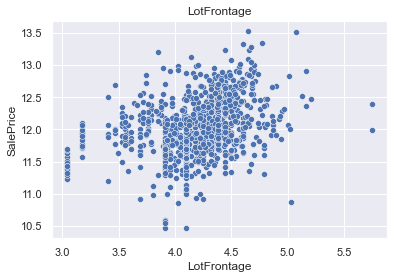

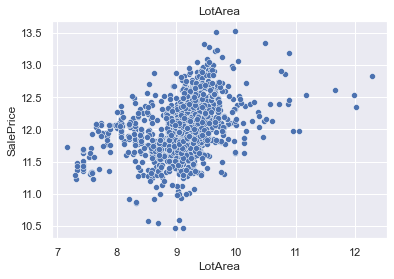

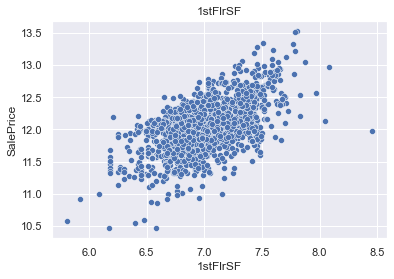

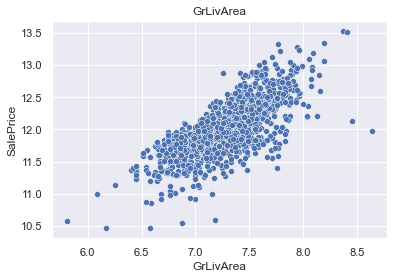

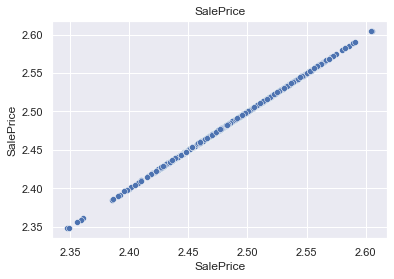

In [22]:
# Using Log Transformation

for i in continous_features:
    data=df.copy()
    
    #As Log 0 is infinity. So before applying logarithm function excluding 0.
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i]) #applying log transformation to the data[i]
        data['SalePrice']=np.log(data['SalePrice']) #applying log transformation to SalePrice as well
        sns.scatterplot(x=data[i],y=data['SalePrice'],data=data)
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.title(i)
        plt.show()

## <font color='purple'> Except SalePrice (SalePrice v/s SalePrice will ofcrz have a linear line), all the other features shows a linear relationship with Target variable(SalePrice) i.e., as the value of variables of each feature increases the SalePrice is also increasing.</font> <font color='red'>**NOTE: That you're getting linear relationship with SalePrice after you've applied log transformation**</font>

## Outliers Detection:

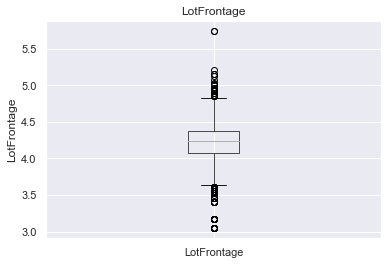

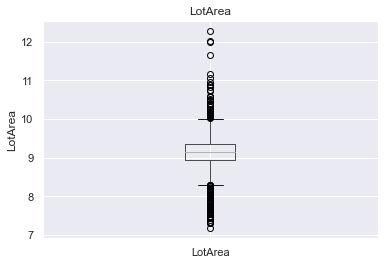

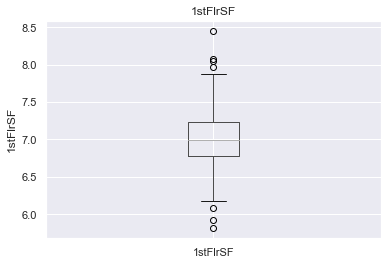

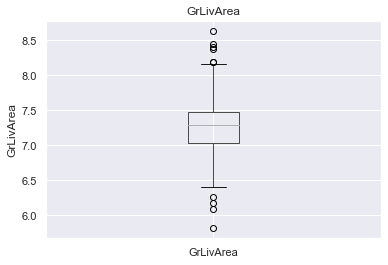

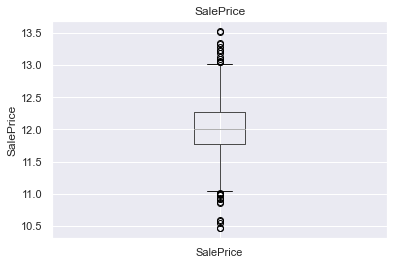

In [23]:
for i in continous_features:
    data=df.copy()
    if 0 in data[i].unique():
        pass
    else:
        data[i]=np.log(data[i])
        data.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

## You can only use this technique of box plot only for continous variables. 

#### C. Categorical Variables:

In [25]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O' ]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [27]:
# Cardinality of each feature:

for i in categorical_features:
    print(i,"And Count of Unique variables are:",len(df[i].unique()))

MSZoning And Count of Unique variables are: 5
Street And Count of Unique variables are: 2
Alley And Count of Unique variables are: 3
LotShape And Count of Unique variables are: 4
LandContour And Count of Unique variables are: 4
Utilities And Count of Unique variables are: 2
LotConfig And Count of Unique variables are: 5
LandSlope And Count of Unique variables are: 3
Neighborhood And Count of Unique variables are: 25
Condition1 And Count of Unique variables are: 9
Condition2 And Count of Unique variables are: 8
BldgType And Count of Unique variables are: 5
HouseStyle And Count of Unique variables are: 8
RoofStyle And Count of Unique variables are: 6
RoofMatl And Count of Unique variables are: 8
Exterior1st And Count of Unique variables are: 15
Exterior2nd And Count of Unique variables are: 16
MasVnrType And Count of Unique variables are: 5
ExterQual And Count of Unique variables are: 4
ExterCond And Count of Unique variables are: 5
Foundation And Count of Unique variables are: 6
BsmtQua

## <font color='purple'> Except "Neighborhood with 25 unique categories", "Exterior1st with 15 unique categories", "Exterior2nd with 16 unique categories" and "SaleType with 9 unique categories" all the other variables can be handled with One-Hot-Encoding-Technique </font>

#### Finding Relationship between categorical feature and Target Variable ('SalePrice'):

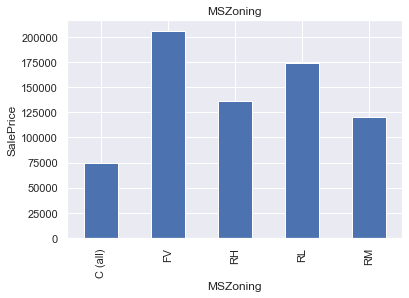

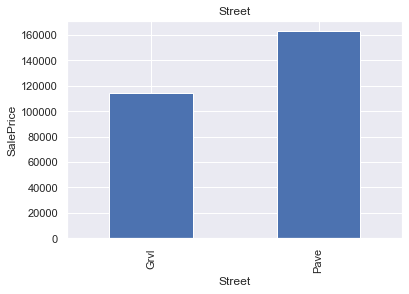

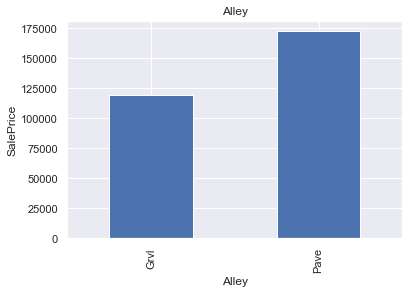

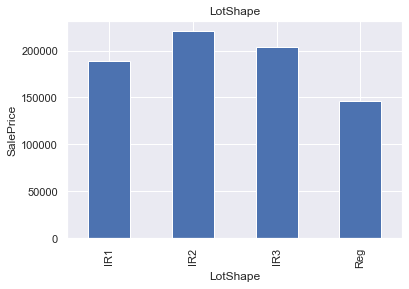

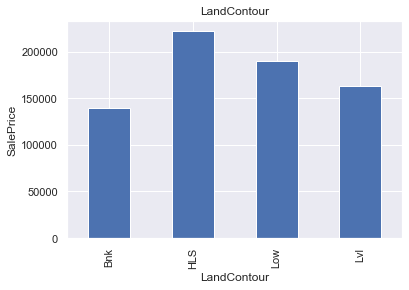

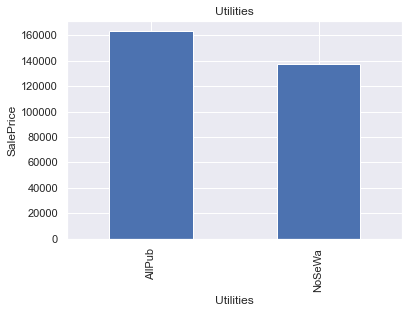

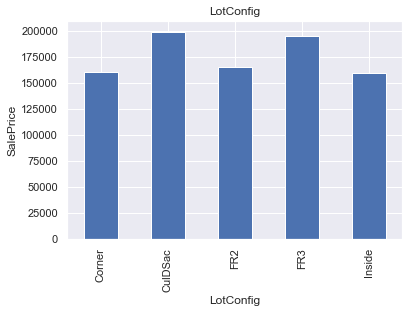

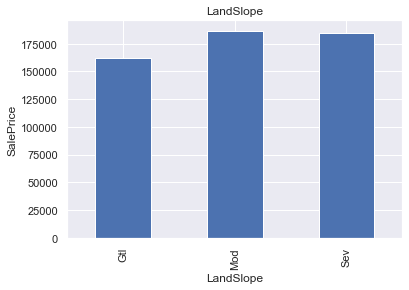

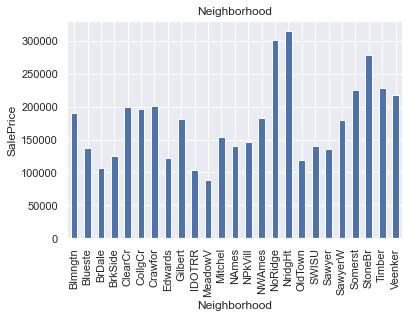

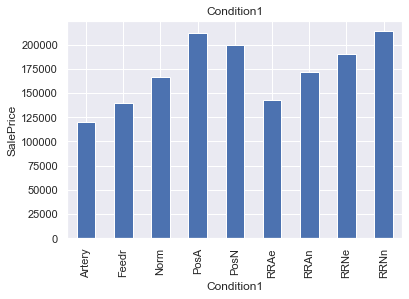

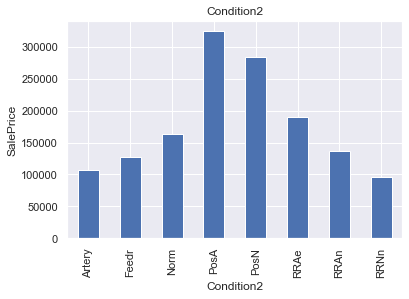

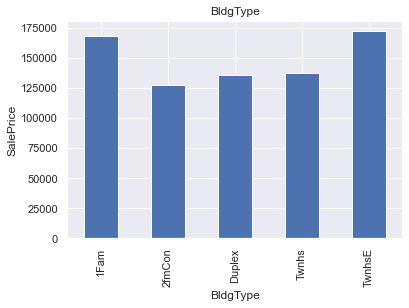

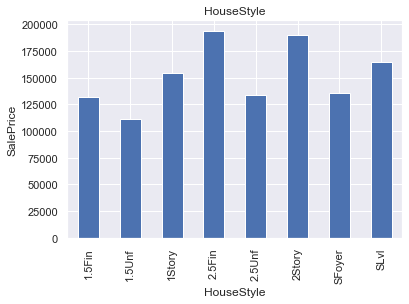

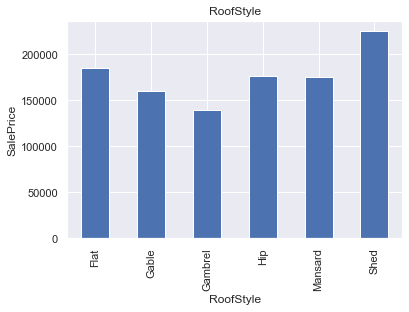

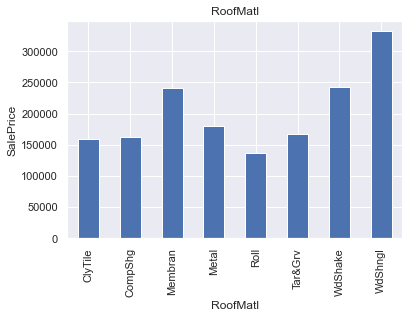

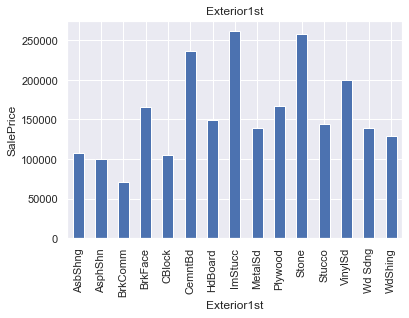

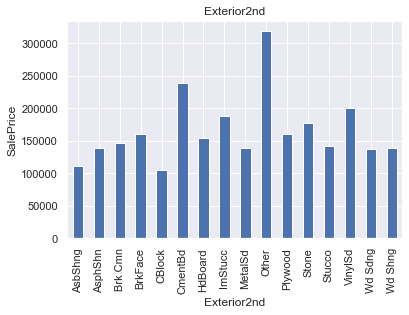

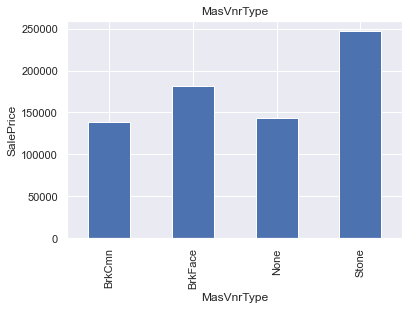

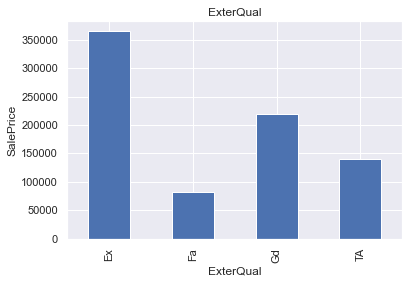

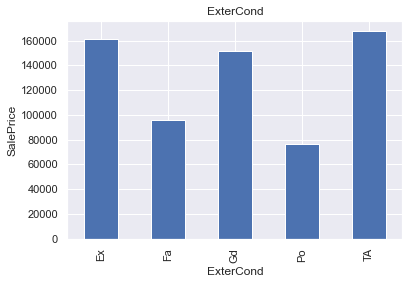

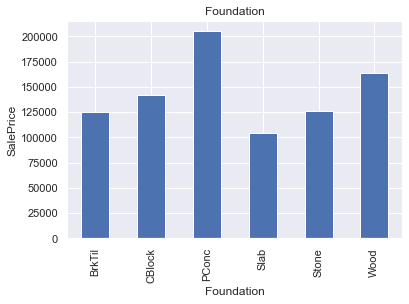

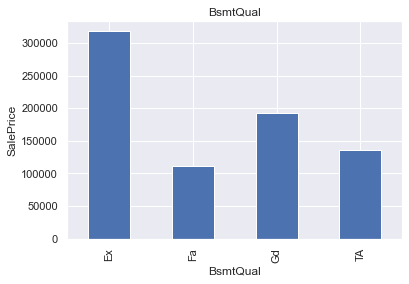

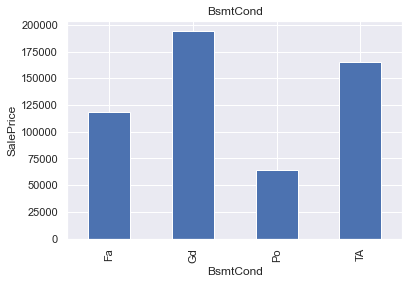

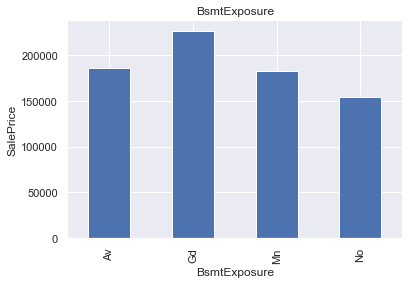

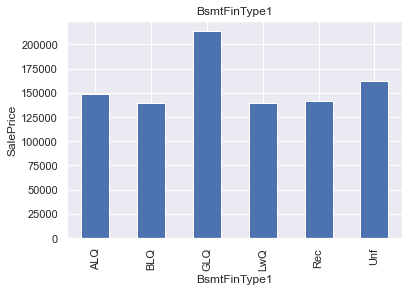

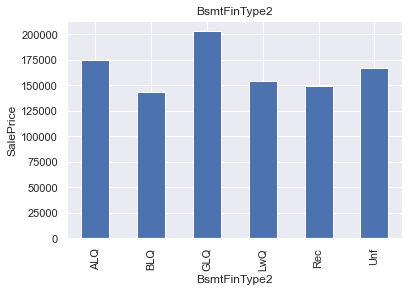

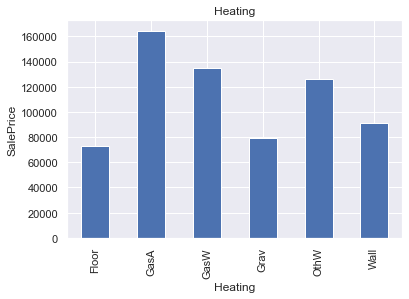

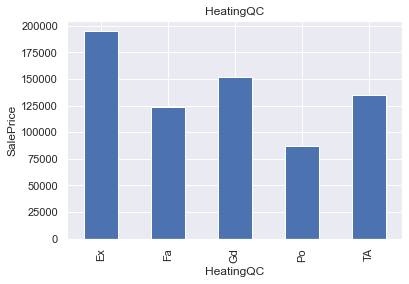

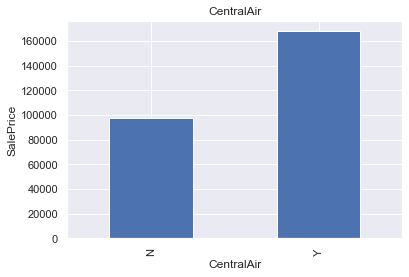

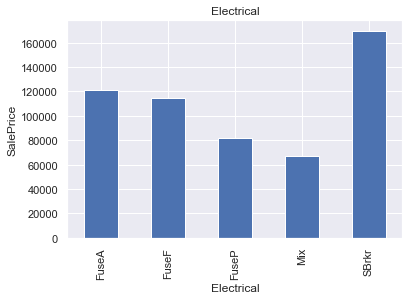

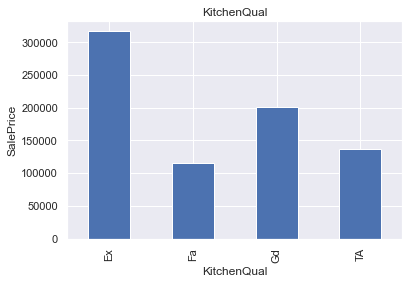

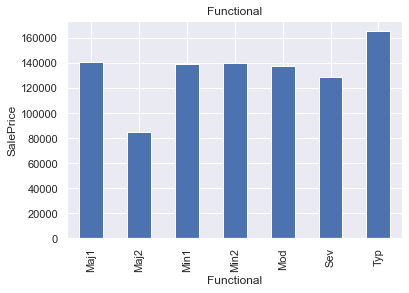

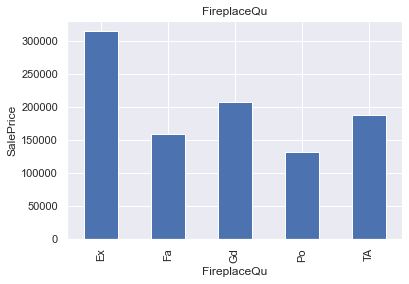

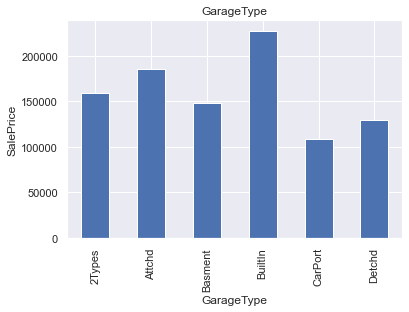

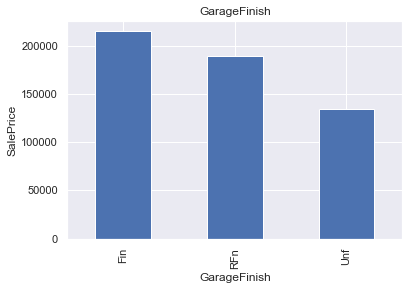

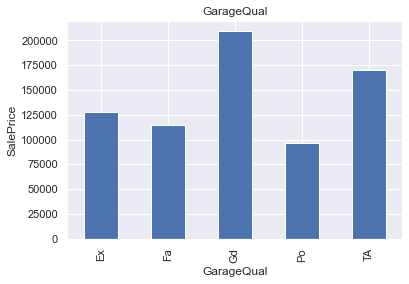

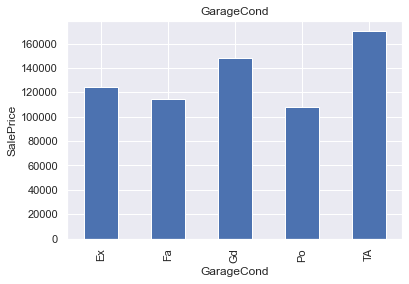

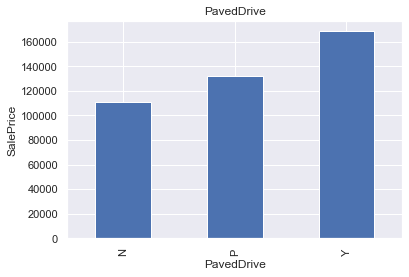

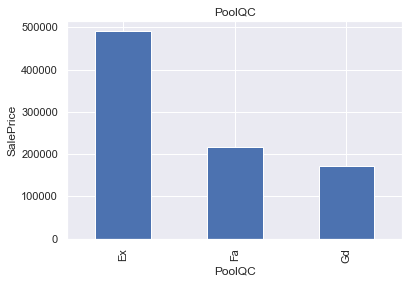

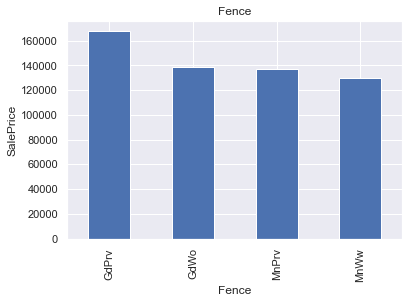

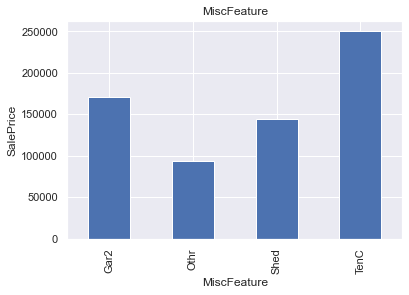

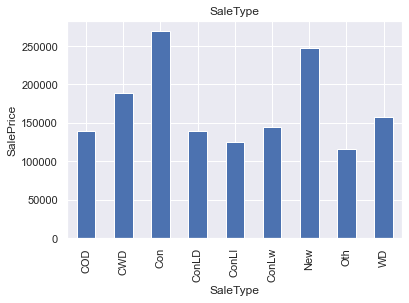

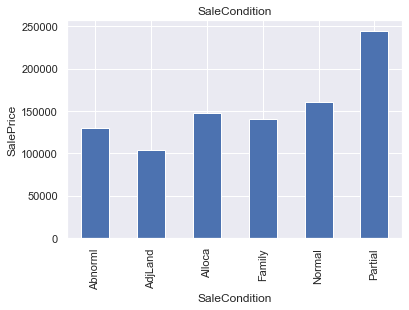

In [29]:
for i in categorical_features:
    data=df.copy()
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title(i)
    plt.show()